<a href="https://colab.research.google.com/github/Tar-ive/Movie-Recommendation-/blob/main/Movie_Recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')


In [4]:
movies_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movies_df['genres'] = le.fit_transform(movies_df['genres'])


In [8]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId')


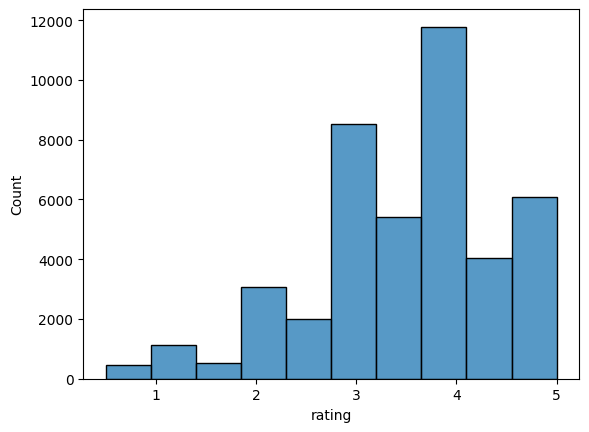

In [9]:
sns.histplot(merged_df['rating'], bins=10)
plt.show()


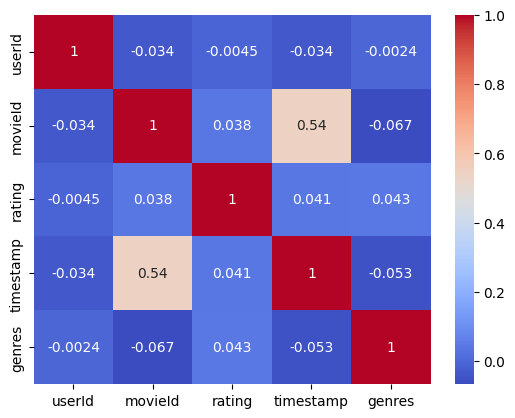

In [10]:
corr = merged_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [12]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193691 sha256=75c8b5224c4f2056c2a0d1cbae722a463c2f170a2ecd68a7132a1b85154d33e6
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [13]:
from surprise import SVD
algo = SVD()


In [16]:
from surprise.model_selection import train_test_split

In [17]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25)


In [18]:
algo.fit(trainset)


In [19]:
predictions = algo.test(testset)

In [21]:
from surprise import accuracy

In [22]:
accuracy.rmse(predictions)

RMSE: 0.8968


0.8968287380549623

In [25]:
from collections import defaultdict

In [26]:
top_n = defaultdict(list)
for uid, iid, true_r, est, _ in predictions:
    top_n[uid].append((iid, est))
for uid, user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    top_n[uid] = user_ratings[:10]

In [29]:
user_id = 2
print(f"Top 10 recommended movies for user {user_id}:")
for movie_id, rating in top_n[user_id]:
    movie_title = movies_df[movies_df['movieId'] == int(movie_id)]['title'].values[0]
    print(f"Movie title: {movie_title}, Predicted rating: {rating:.2f}")

Top 10 recommended movies for user 2:
Movie title: Dark Knight, The (2008), Predicted rating: 4.45
Movie title: Good Will Hunting (1997), Predicted rating: 4.28
Movie title: Django Unchained (2012), Predicted rating: 4.04
Movie title: Exit Through the Gift Shop (2010), Predicted rating: 3.91
Movie title: Wolf of Wall Street, The (2013), Predicted rating: 3.90
Movie title: Mad Max: Fury Road (2015), Predicted rating: 3.80
Movie title: The Drop (2014), Predicted rating: 3.72
Movie title: Ex Machina (2015), Predicted rating: 3.69
Movie title: Girl with the Dragon Tattoo, The (2011), Predicted rating: 3.59


In [32]:
import matplotlib.pyplot as plt

# # Loop through users 1-10
# for user_id in range(1, 11):
#     # Get the top 5 movie recommendations for the user
#     top_movies = [movies_df[movies_df['movieId'] == int(movie_id)]['title'].values[0] 
#                   for movie_id, rating in top_n[user_id][:5]]
    
#     # # Plot the recommendations on a bar chart
#     # plt.figure(figsize=(8, 5))
#     # plt.bar(top_movies, [rating for movie_id, rating in top_n[user_id][:5]])
#     # plt.xlabel("Movie Title")
#     # plt.ylabel("Predicted Rating")
#     # plt.ylim(0, 5)
#     # plt.title(f"Top 5 recommended movies for user {user_id}")
#     # plt.xticks(rotation=90)
#     # plt.show()

#     # Print the recommendations in a table
#     print(f"Top 5 recommended movies for user {user_id}:")
#     print("{:<50} {:<10}".format("Movie Title", "Predicted Rating"))
#     print("-" * 60)
#     for movie, rating in top_movies:
#         print("{:<50} {:<10.2f}".format(movie, rating))
#     print("\n")


for user_id in range(1, 11):
    
    top_movies = []
    for movie_id, rating in top_n[user_id][:5]:
        movie_title = movies_df[movies_df['movieId'] == int(movie_id)]['title'].values
        if len(movie_title) == 0:
            top_movies.append((f"Unknown movie (ID: {movie_id})", rating))
        else:
            top_movies.append((movie_title[0], rating))
    
    # Print the recommendations in a table
    print(f"Top 5 recommended movies for user {user_id}:")
    print("{:<50} {:<10}".format("Movie Title", "Predicted Rating"))
    print("-" * 60)
    for movie, rating in top_movies:
        print("{:<50} {:<10.2f}".format(movie, rating))
    print("\n")



Top 5 recommended movies for user 1:
Movie Title                                        Predicted Rating
------------------------------------------------------------
Heat (1995)                                        4.81      
Silence of the Lambs, The (1991)                   4.70      
Pink Floyd: The Wall (1982)                        4.70      
Back to the Future (1985)                          4.64      
Blues Brothers, The (1980)                         4.64      


Top 5 recommended movies for user 2:
Movie Title                                        Predicted Rating
------------------------------------------------------------
Dark Knight, The (2008)                            4.45      
Good Will Hunting (1997)                           4.28      
Django Unchained (2012)                            4.04      
Exit Through the Gift Shop (2010)                  3.91      
Wolf of Wall Street, The (2013)                    3.90      


Top 5 recommended movies for user 3:
Movie T

In [33]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [48]:
reader = Reader()
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

In [36]:
trainset, testset = train_test_split(data, test_size=.25)

In [37]:
sim_options = {'name': 'pearson'}
algo = KNNWithMeans(k=50, sim_options=sim_options)
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [38]:
sim_matrix = algo.compute_similarities()


Computing the pearson similarity matrix...
Done computing similarity matrix.


In [39]:
user_id = 1
user_index = trainset.to_inner_uid(user_id)
user_sim_scores = sim_matrix[user_index]

In [40]:
top_sim_user_indices = user_sim_scores.argsort()[::-1][1:11]

# Convert the indices back to user IDs
top_sim_user_ids = [trainset.to_raw_uid(sim_user_index) for sim_user_index in top_sim_user_indices]

In [41]:
print(f"Top 10 users most similar to user {user_id}: {top_sim_user_ids}")

Top 10 users most similar to user 1: [106, 49, 146, 218, 1, 13, 99, 196, 206, 208]


In [46]:
print(ratings_df.columns)


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [49]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
user_id = 1
user_ratings = merged_df[merged_df['userId'] == user_id]
genre_ratings = user_ratings.groupby('genres')['rating'].mean()

# Print the user's average ratings for each genre
print(genre_ratings)


genres
2      5.0
35     4.5
42     3.0
46     5.0
62     4.0
      ... 
910    4.0
915    2.5
919    4.0
937    5.0
948    5.0
Name: rating, Length: 121, dtype: float64


In [50]:
num_users = ratings_df['userId'].nunique()
print(num_users)

288


In [52]:
movies_df['genres'] = movies_df['genres'].astype(str)


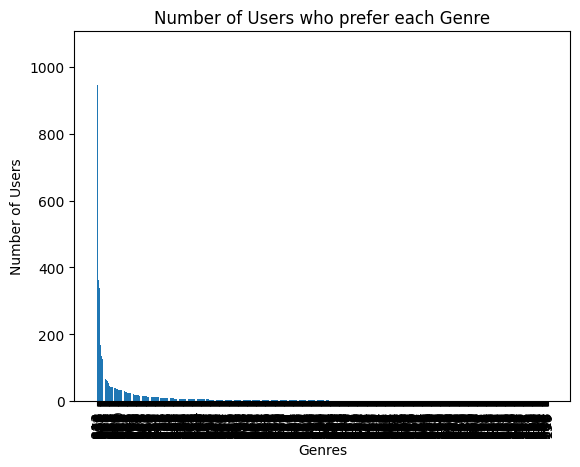

In [53]:
import matplotlib.pyplot as plt

# Count of users who prefer each genre
genre_counts = movies_df['genres'].str.split('|', expand=True).stack().reset_index(drop=True).value_counts()

# Plotting the bar graph
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Users')
plt.title('Number of Users who prefer each Genre')
plt.show()


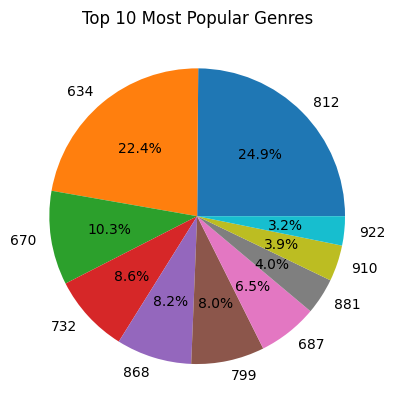

In [54]:
import matplotlib.pyplot as plt

# Count of users who prefer each genre

# Top 10 most popular genres
top_genres = genre_counts[:10]

# Plotting the pie chart
plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%')
plt.title('Top 10 Most Popular Genres')
plt.show()


In [56]:
print(top_genres[:10])

812    1053
634     946
670     435
732     363
868     349
799     339
687     276
881     168
910     167
922     135
dtype: int64


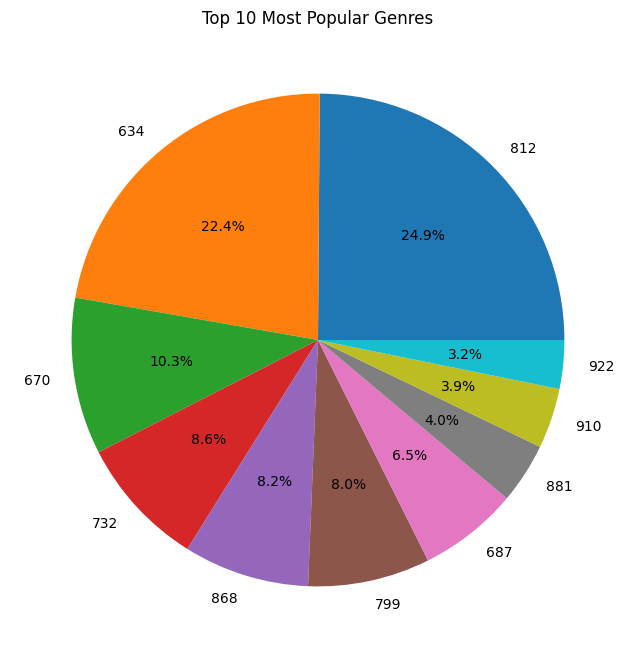

In [57]:
import matplotlib.pyplot as plt

# Count of users who prefer each genre
genre_counts = movies_df['genres'].str.split('|', expand=True).stack().reset_index(drop=True).value_counts()

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(genre_counts.head(10), labels=genre_counts.head(10).index, autopct='%1.1f%%')
plt.title('Top 10 Most Popular Genres')
plt.show()


In [58]:
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import cross_validate


In [59]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)


In [60]:
sim_options = {'name': 'cosine',
               'user_based': True}


In [61]:
model = KNNBasic(sim_options=sim_options)
model.fit(data.build_full_trainset())


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [62]:
user_id = 1
movie_id = 1
pred = model.predict(user_id, movie_id)
print(pred.est)


3.9499661715332897


In [63]:
# Step 1: Find the user's average rating for each genre
user_id = 1
user_ratings = ratings_df[ratings_df['userId'] == user_id]
genre_ratings = user_ratings.groupby('genres')['rating'].mean()

# Step 2: Sort the genres based on the user's average ratings
sorted_genres = genre_ratings.sort_values(ascending=False)

# Step 3: Select the genre with the highest average rating as the user's preferred genre
preferred_genre = sorted_genres.index[0]

# Step 4: Recommend movies of the preferred genre to the user
movies_df[movies_df['genres'].str.contains(preferred_genre)].head(10)


KeyError: ignored